### Цель работы

Целью данной лабораторной работы является практическое изучение алгоритмов и методов классификации на практике.

### Задание

Вариант: 3. \
Набор данных: `ecommerce_fraud.csv`.

**Описание данных:**

Данные содержат информацию о мошеннических транзакциях в электронной коммерции:
- **transaction_amount** — сумма транзакции, USD, числовой
- **device_type** — тип устройства: Desktop / Mobile / Tablet, категориальный
- **browser** — браузер: Chrome / Safari / Firefox / Edge / Other, категориальный
- **payment_method** — способ оплаты: Card / PayPal / BankTransfer / COD, категориальный
- **country** — страна покупателя: US / UK / DE / FR / IN / BR / CN / Other, категориальный
- **num_items** — количество товаров в заказе, целочисленный (1–7)
- **time_on_site_sec** — время на сайте до покупки, секунды, числовой
- **is_first_purchase** — первая покупка у этого продавца: Yes / No, категориальный
- **referral** — источник трафика: Direct / Search / Social / Ads, категориальный
- **hour_of_day** — час суток оформления заказа (0–23), целочисленный
- **account_age_days** — возраст аккаунта, в днях, числовой
- **Fraud** — целевой класс: 1 — мошенническая транзакция, 0 — нормальная

# Ход работы

## 1. Импорт необходимых библиотек

In [19]:
# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Алгоритмы классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Метрики качества
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    auc,
    balanced_accuracy_score
)

print('Все библиотеки успешно импортированы!')

Все библиотеки успешно импортированы!


## 2. Загрузка и первичный анализ данных

На этом этапе я загружаю набор данных о мошеннических транзакциях в электронной коммерции и провожу первичный анализ для понимания структуры данных, наличия пропусков и общих характеристик.

In [20]:
# Загрузка данных
df = pd.read_csv('ecommerce_fraud.csv')

# Вывод первых строк
print('Первые 5 строк данных:')
display(df.head())

# Общая информация о данных
print('\nОбщая информация о данных:')
df.info()

# Статистическое описание числовых признаков
print('\nСтатистическое описание числовых признаков:')
display(df.describe())

# Размер датасета
print(f'\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')

Первые 5 строк данных:


,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0



Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_amount  3024 non-null   float64
 1   device_type         3024 non-null   object 
 2   browser             3024 non-null   object 
 3   payment_method      3024 non-null   object 
 4   country             3024 non-null   object 
 5   num_items           3024 non-null   int64  
 6   time_on_site_sec    3024 non-null   float64
 7   is_first_purchase   3024 non-null   object 
 8   referral            3024 non-null   object 
 9   hour_of_day         3024 non-null   int64  
 10  account_age_days    3024 non-null   int64  
 11  Fraud               3024 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 283.6+ KB

Статистическое описание числовых признаков:


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,84.492933,4.034722,163.180688,11.383929,922.302579,0.044643
std,126.090008,1.983504,113.971918,6.916191,529.453654,0.206553
min,-7.400000,1.000000,-150.000000,0.000000,2.000000,0.000000
25%,17.615000,2.000000,82.000000,5.000000,459.000000,0.000000
50%,45.370000,4.000000,141.000000,12.000000,934.500000,0.000000
75%,99.937500,6.000000,218.250000,17.000000,1380.250000,0.000000
max,1985.300000,7.000000,902.000000,23.000000,1823.000000,1.000000



Размер датасета: 3024 строк, 12 столбцов


### 2.1 Проверка пропущенных значений и дубликатов

In [21]:
# Проверка наличия пропусков
print('Количество пропущенных значений по столбцам:')
nulls = df.isnull().sum()
print(nulls[nulls > 0] if nulls.sum() > 0 else 'Пропущенных значений нет')

# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f'\nКоличество дубликатов: {duplicates}')

Количество пропущенных значений по столбцам:
Пропущенных значений нет

Количество дубликатов: 0


### 2.2 Анализ целевой переменной

Анализирую распределение целевой переменной **Fraud**, чтобы понять баланс классов в данных.

Распределение целевой переменной Fraud:
Fraud
0    2889
1     135
Name: count, dtype: int64

Доля мошеннических транзакций: 4.46%
Доля нормальных транзакций: 95.54%


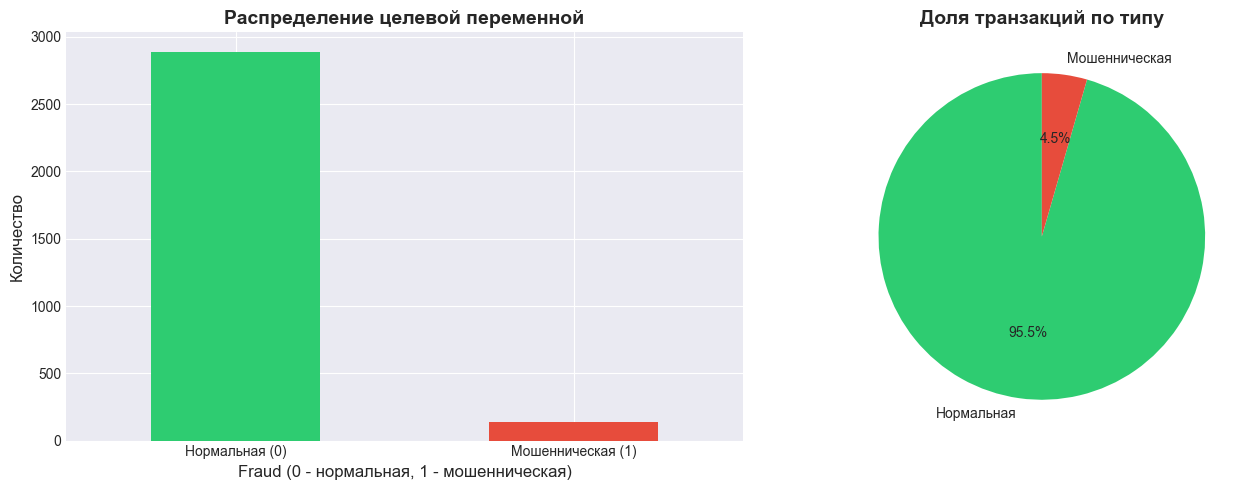

In [22]:
# Распределение целевой переменной
print('Распределение целевой переменной Fraud:')
fraud_counts = df['Fraud'].value_counts()
print(fraud_counts)
print(f'\nДоля мошеннических транзакций: {fraud_counts[1] / len(df) * 100:.2f}%')
print(f'Доля нормальных транзакций: {fraud_counts[0] / len(df) * 100:.2f}%')

# Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Столбчатая диаграмма
fraud_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Распределение целевой переменной', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fraud (0 - нормальная, 1 - мошенническая)', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_xticklabels(['Нормальная (0)', 'Мошенническая (1)'], rotation=0)

# Круговая диаграмма
axes[1].pie(fraud_counts, labels=['Нормальная', 'Мошенническая'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Доля транзакций по типу', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Предварительная обработка данных

На этом этапе я выполняю предобработку данных: обработку категориальных признаков и подготовку данных для моделирования.

### 3.1 Анализ категориальных признаков

In [23]:
# Выделение категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f'Категориальные признаки: {categorical_features}\n')

# Анализ уникальных значений
for col in categorical_features:
    print(f'{col}: {df[col].unique()}')
    print(f'Количество уникальных значений: {df[col].nunique()}\n')

Категориальные признаки: ['device_type', 'browser', 'payment_method', 'country', 'is_first_purchase', 'referral']

device_type: ['Desktop' 'Mobile' 'Tablet']
Количество уникальных значений: 3

browser: ['Safari' 'Chrome' 'Edge' 'Firefox' 'Other']
Количество уникальных значений: 5

payment_method: ['COD' 'Card' 'PayPal' 'BankTransfer']
Количество уникальных значений: 4

country: ['UK' 'US' 'DE' 'Other' 'BR' 'IN' 'FR' 'CN']
Количество уникальных значений: 8

is_first_purchase: ['No' 'Yes']
Количество уникальных значений: 2

referral: ['Direct' 'Social' 'Search' 'Ads']
Количество уникальных значений: 4



### 3.2 Кодирование категориальных признаков

Для работы алгоритмов машинного обучения необходимо преобразовать категориальные признаки в числовые. Я использую прямое кодирование (One-Hot Encoding) для категориальных переменных.

In [24]:
# Создание копии данных для обработки
df_processed = df.copy()

# Прямое кодирование категориальных признаков
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

print(f'Размер данных после кодирования: {df_encoded.shape}')
print(f'\nПервые строки закодированных данных:')
display(df_encoded.head())

Размер данных после кодирования: (3024, 26)

Первые строки закодированных данных:


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud,device_type_Mobile,device_type_Tablet,browser_Edge,browser_Firefox,...,country_DE,country_FR,country_IN,country_Other,country_UK,country_US,is_first_purchase_Yes,referral_Direct,referral_Search,referral_Social
0,62.18,3,58.0,15,808,0,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,28.16,2,75.0,10,753,0,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
2,17.57,1,101.0,21,1017,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61.61,4,63.0,20,1146,0,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,4.28,7,399.0,4,1134,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


## 4. Выделение признаков и целевой переменной

Отделяю целевую переменную **Fraud** от признаков для дальнейшего обучения моделей.

In [25]:
# Выделение целевой переменной
y = df_encoded['Fraud']
X = df_encoded.drop('Fraud', axis=1)

print(f'Размерность признаков X: {X.shape}')
print(f'Размерность целевой переменной y: {y.shape}')
print(f'\nСписок признаков для модели:')
print(X.columns.tolist())

Размерность признаков X: (3024, 25)
Размерность целевой переменной y: (3024,)

Список признаков для модели:
['transaction_amount', 'num_items', 'time_on_site_sec', 'hour_of_day', 'account_age_days', 'device_type_Mobile', 'device_type_Tablet', 'browser_Edge', 'browser_Firefox', 'browser_Other', 'browser_Safari', 'payment_method_COD', 'payment_method_Card', 'payment_method_PayPal', 'country_CN', 'country_DE', 'country_FR', 'country_IN', 'country_Other', 'country_UK', 'country_US', 'is_first_purchase_Yes', 'referral_Direct', 'referral_Search', 'referral_Social']


## 5. Построение матрицы диаграмм рассеяния

Для визуализации взаимосвязей между числовыми признаками строю матрицу диаграмм рассеяния (pairplot), выделяя разными цветами значения целевой переменной.

Построение матрицы диаграмм рассеяния...


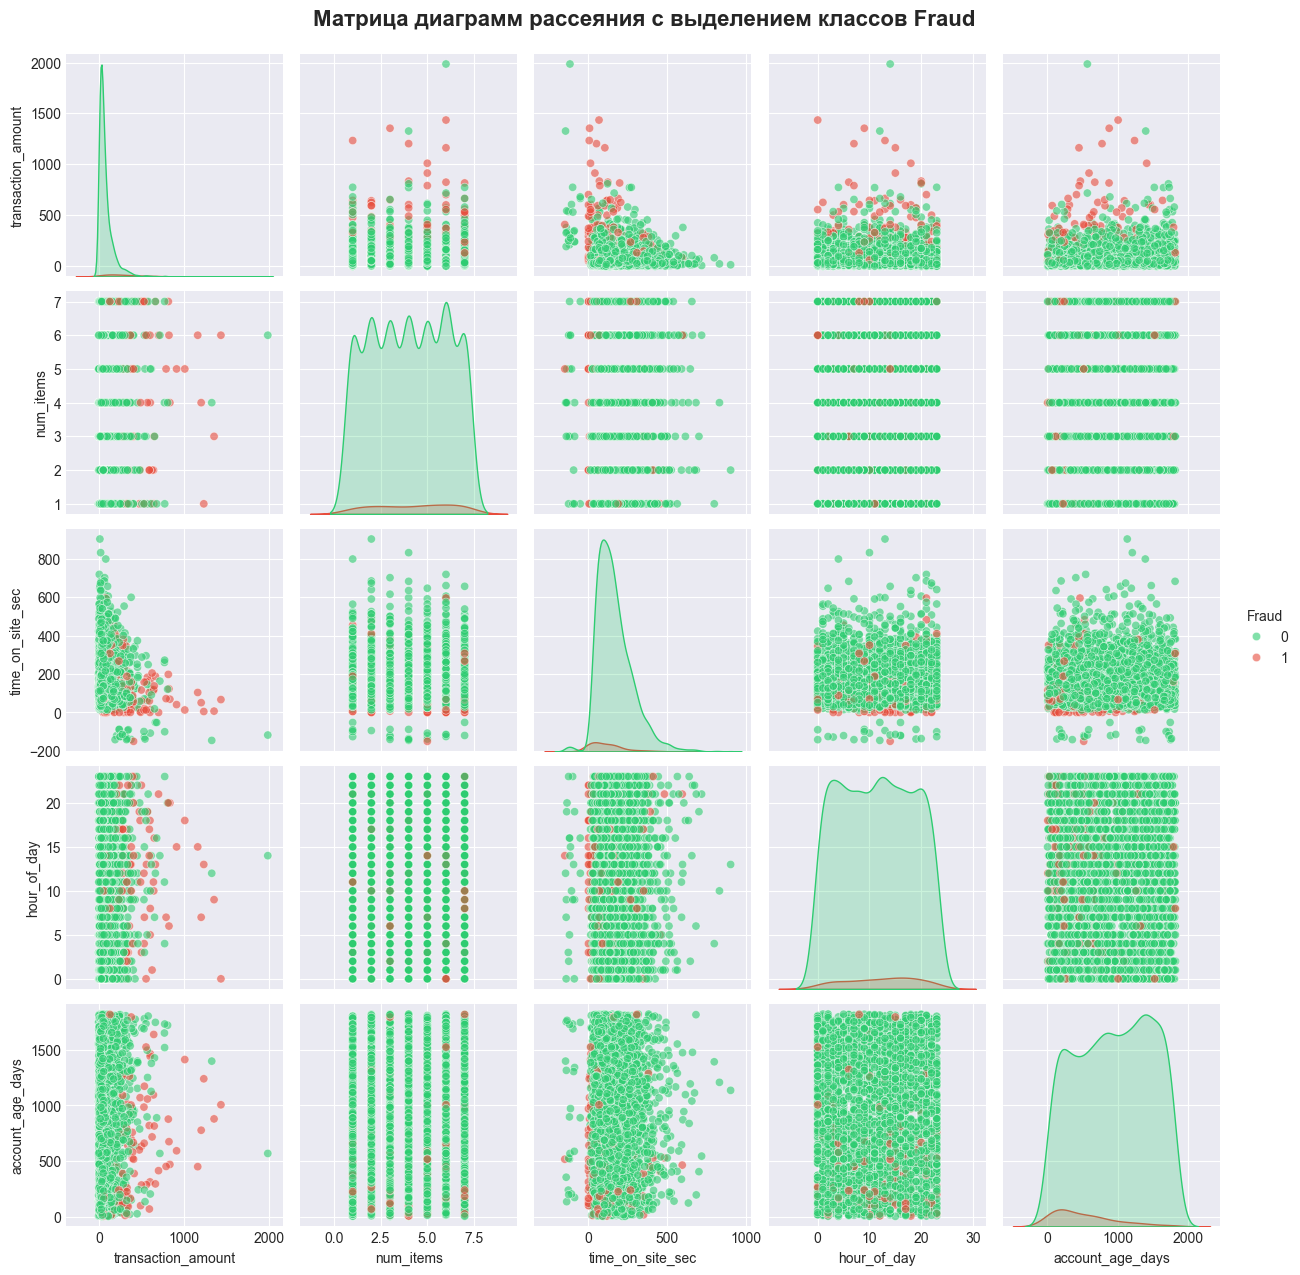


Анализ матрицы показывает взаимосвязи между признаками и их распределение для каждого класса.


In [26]:
# Выбираю несколько наиболее важных числовых признаков для визуализации
numeric_features = ['transaction_amount', 'num_items', 'time_on_site_sec', 
                    'hour_of_day', 'account_age_days']

# Создание датафрейма для pairplot
pairplot_data = df[numeric_features + ['Fraud']].copy()

# Построение матрицы диаграмм рассеяния
print('Построение матрицы диаграмм рассеяния...')
pairplot = sns.pairplot(pairplot_data, hue='Fraud', palette={0: '#2ecc71', 1: '#e74c3c'},
                        diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
pairplot.fig.suptitle('Матрица диаграмм рассеяния с выделением классов Fraud', 
                      y=1.02, fontsize=16, fontweight='bold')
plt.show()

print('\nАнализ матрицы показывает взаимосвязи между признаками и их распределение для каждого класса.')

## 6. Разбиение данных и стандартизация

Разбиваю данные на обучающую и тестовую выборки в соотношении 70:30 и выполняю стандартизацию числовых признаков.

In [27]:
# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print(f'Размер обучающей выборки: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Размер тестовой выборки: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)')

# Проверка баланса классов в выборках
print(f'\nРаспределение классов в обучающей выборке:')
print(y_train.value_counts(normalize=True))
print(f'\nРаспределение классов в тестовой выборке:')
print(y_test.value_counts(normalize=True))

Размер обучающей выборки: 2116 (70.0%)
Размер тестовой выборки: 908 (30.0%)

Распределение классов в обучающей выборке:
Fraud
0    0.955577
1    0.044423
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Fraud
0    0.954846
1    0.045154
Name: proportion, dtype: float64


In [28]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame для удобства
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Стандартизация данных выполнена успешно!')
print(f'\nПример стандартизированных данных (первые 5 строк):')
display(X_train_scaled.head())

Стандартизация данных выполнена успешно!

Пример стандартизированных данных (первые 5 строк):


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,device_type_Mobile,device_type_Tablet,browser_Edge,browser_Firefox,browser_Other,...,country_DE,country_FR,country_IN,country_Other,country_UK,country_US,is_first_purchase_Yes,referral_Direct,referral_Search,referral_Social
245,-0.629324,1.497180,0.700212,1.089323,0.981113,1.050419,-0.28212,-0.340637,-0.429077,-0.219188,...,-0.298392,-0.296509,-0.367686,-0.330174,-0.350916,-0.692618,-0.826664,-0.652592,1.126034,-0.440603
1932,-0.389183,0.989970,0.682768,-0.635659,-1.384441,-0.952001,-0.28212,-0.340637,-0.429077,-0.219188,...,-0.298392,-0.296509,-0.367686,-0.330174,2.849682,-0.692618,1.209682,1.532352,-0.888073,-0.440603
2558,0.415962,1.497180,-0.137117,1.233071,-0.211187,-0.952001,-0.28212,-0.340637,-0.429077,-0.219188,...,-0.298392,-0.296509,-0.367686,-0.330174,-0.350916,1.443796,-0.826664,1.532352,-0.888073,-0.440603
735,-0.523285,-1.038869,-0.529615,0.945574,-0.329275,-0.952001,-0.28212,-0.340637,-0.429077,-0.219188,...,-0.298392,3.372576,-0.367686,-0.330174,-0.350916,-0.692618,-0.826664,-0.652592,-0.888073,-0.440603
1964,-0.610385,0.482760,0.255381,1.520568,0.689704,1.050419,-0.28212,2.935674,-0.429077,-0.219188,...,-0.298392,-0.296509,2.719711,-0.330174,-0.350916,-0.692618,1.209682,1.532352,-0.888073,-0.440603


## 7. Разработка моделей классификации

Реализую четыре метода классификации:
1. **k-ближайших соседей (KNN)**
2. **Дерево решений (Decision Tree)**
3. **Логистическая регрессия (Logistic Regression)**
4. **Случайный лес (Random Forest)**

### 7.1 Метод k-ближайших соседей (KNN)

Метод k-ближайших соседей классифицирует объект на основе большинства голосов его k ближайших соседей. Начну с k=5.

In [29]:
# Создание и обучение модели KNN
print('Обучение модели k-ближайших соседей...')
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Предсказания
knn_predictions = knn_model.predict(X_test_scaled)
knn_probabilities = knn_model.predict_proba(X_test_scaled)

print('Обучение модели KNN завершено!')

Обучение модели k-ближайших соседей...
Обучение модели KNN завершено!


### 7.2 Дерево решений (Decision Tree)

Дерево решений строит модель в виде древовидной структуры, где каждый узел представляет проверку признака.

In [30]:
# Создание и обучение модели дерева решений
print('Обучение модели дерева решений...')
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)

# Предсказания
dt_predictions = dt_model.predict(X_test_scaled)
dt_probabilities = dt_model.predict_proba(X_test_scaled)

print('Обучение модели дерева решений завершено!')

Обучение модели дерева решений...
Обучение модели дерева решений завершено!


### 7.3 Логистическая регрессия (Logistic Regression)

Логистическая регрессия — линейная модель для бинарной классификации, которая предсказывает вероятность принадлежности к классу.

In [31]:
# Создание и обучение модели логистической регрессии
print('Обучение модели логистической регрессии...')
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Предсказания
lr_predictions = lr_model.predict(X_test_scaled)
lr_probabilities = lr_model.predict_proba(X_test_scaled)

print('Обучение модели логистической регрессии завершено!')

Обучение модели логистической регрессии...
Обучение модели логистической регрессии завершено!


### 7.4 Случайный лес (Random Forest)

Случайный лес — ансамблевый метод, объединяющий множество деревьев решений для повышения точности и устойчивости.

In [32]:
# Создание и обучение модели случайного леса
print('Обучение модели случайного леса...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

# Предсказания
rf_predictions = rf_model.predict(X_test_scaled)
rf_probabilities = rf_model.predict_proba(X_test_scaled)

print('Обучение модели случайного леса завершено!')

Обучение модели случайного леса...
Обучение модели случайного леса завершено!


## 8. Оценка качества моделей

Для каждого метода вычисляю следующие метрики:
- **Accuracy** — доля правильных ответов
- **Precision** — точность (доля правильно предсказанных положительных среди всех предсказанных положительных)
- **Recall** — полнота (доля найденных положительных среди всех реальных положительных)
- **Balanced Accuracy** — сбалансированная точность
- **F1 Score** — гармоническое среднее точности и полноты

In [33]:
# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    
    return {
        'Модель': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Balanced Accuracy': balanced_acc,
        'F1 Score': f1
    }

# Вычисление метрик для всех моделей
metrics_list = []
metrics_list.append(calculate_metrics(y_test, knn_predictions, 'KNN'))
metrics_list.append(calculate_metrics(y_test, dt_predictions, 'Decision Tree'))
metrics_list.append(calculate_metrics(y_test, lr_predictions, 'Logistic Regression'))
metrics_list.append(calculate_metrics(y_test, rf_predictions, 'Random Forest'))

# Создание DataFrame с метриками
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.set_index('Модель')

print('Метрики качества для всех моделей:')
display(metrics_df.round(4))

Метрики качества для всех моделей:


,Accuracy,Precision,Recall,Balanced Accuracy,F1 Score
Модель,,,,,
KNN,0.9570,0.7500,0.0732,0.5360,0.1333
Decision Tree,0.9515,0.4516,0.3415,0.6609,0.3889
Logistic Regression,0.9615,0.7500,0.2195,0.6080,0.3396
Random Forest,0.9604,0.8571,0.1463,0.5726,0.2500


## 9. Матрицы неточностей (Confusion Matrix)

Матрица неточностей показывает, как модель классифицирует объекты каждого класса.

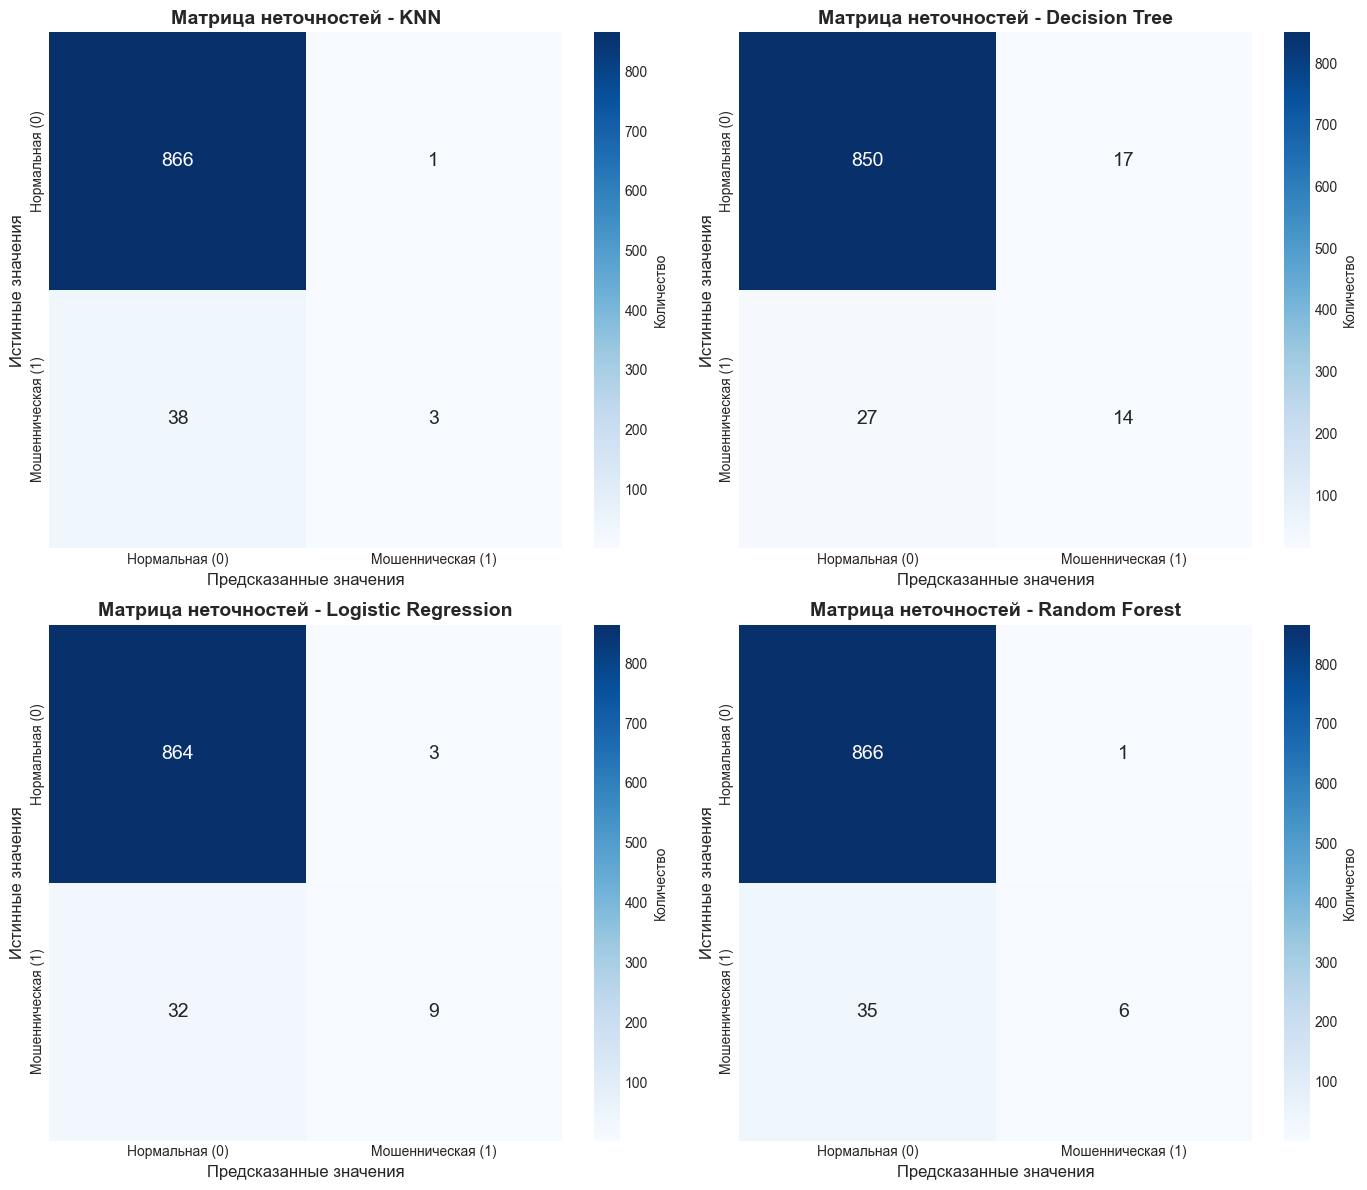

In [34]:
# Создание матриц неточностей для всех моделей
models = [
    ('KNN', knn_predictions),
    ('Decision Tree', dt_predictions),
    ('Logistic Regression', lr_predictions),
    ('Random Forest', rf_predictions)
]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (model_name, predictions) in enumerate(models):
    cm = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Количество'}, annot_kws={'size': 14})
    axes[idx].set_title(f'Матрица неточностей - {model_name}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Истинные значения', fontsize=12)
    axes[idx].set_xlabel('Предсказанные значения', fontsize=12)
    axes[idx].set_xticklabels(['Нормальная (0)', 'Мошенническая (1)'])
    axes[idx].set_yticklabels(['Нормальная (0)', 'Мошенническая (1)'])

plt.tight_layout()
plt.show()

### 9.1 Детальные отчеты классификации

In [35]:
# Вывод детальных отчетов для каждой модели
for model_name, predictions in models:
    print(f'\n{"="*60}')
    print(f'Отчет классификации - {model_name}')
    print(f'{"="*60}')
    print(classification_report(y_test, predictions, 
                                target_names=['Нормальная', 'Мошенническая']))


Отчет классификации - KNN
               precision    recall  f1-score   support

   Нормальная       0.96      1.00      0.98       867
Мошенническая       0.75      0.07      0.13        41

     accuracy                           0.96       908
    macro avg       0.85      0.54      0.56       908
 weighted avg       0.95      0.96      0.94       908


Отчет классификации - Decision Tree
               precision    recall  f1-score   support

   Нормальная       0.97      0.98      0.97       867
Мошенническая       0.45      0.34      0.39        41

     accuracy                           0.95       908
    macro avg       0.71      0.66      0.68       908
 weighted avg       0.95      0.95      0.95       908


Отчет классификации - Logistic Regression
               precision    recall  f1-score   support

   Нормальная       0.96      1.00      0.98       867
Мошенническая       0.75      0.22      0.34        41

     accuracy                           0.96       908
    m

## 10. ROC-кривые для всех методов

ROC-кривая (Receiver Operating Characteristic) показывает зависимость между долей истинно положительных (TPR) и долей ложно положительных (FPR) классификаций при различных порогах. Площадь под кривой (AUC) является мерой качества классификатора.

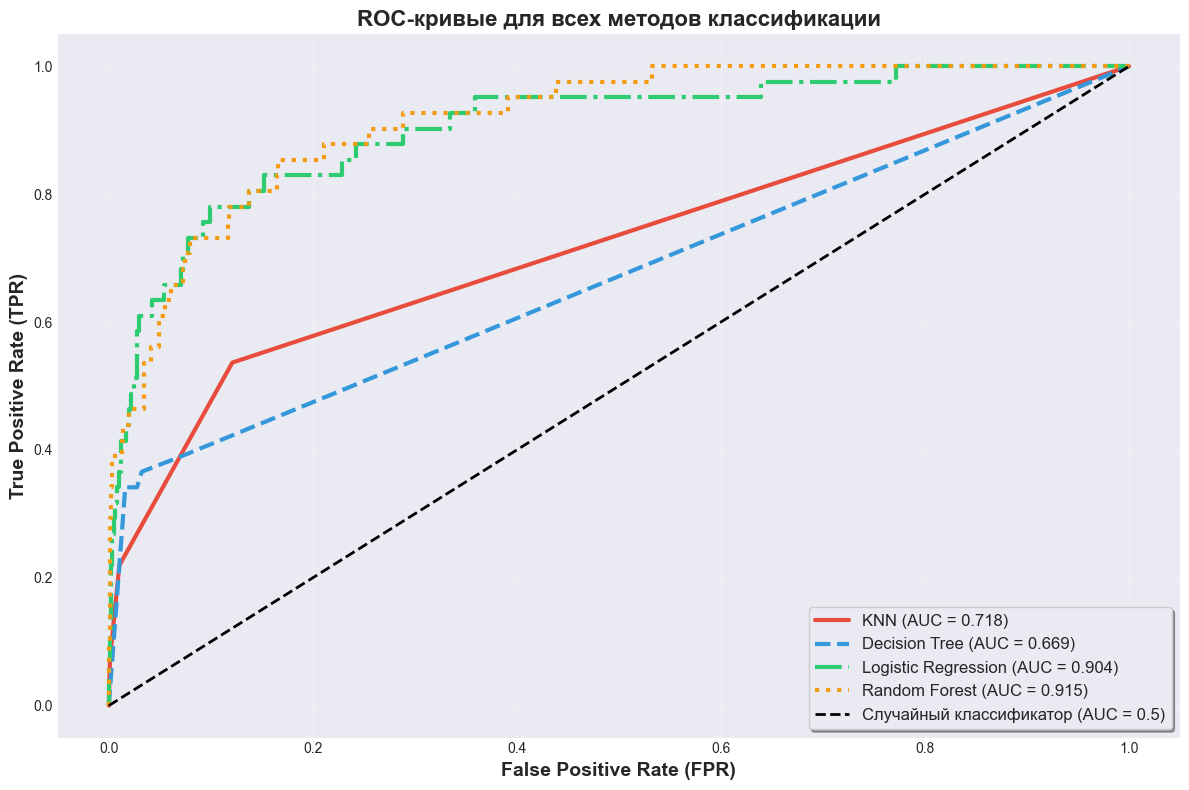


Значения AUC для каждой модели:
KNN: 0.7185
Decision Tree: 0.6686
Logistic Regression: 0.9042
Random Forest: 0.9153


In [36]:
# Подготовка данных для ROC-кривых
models_proba = [
    ('KNN', knn_probabilities),
    ('Decision Tree', dt_probabilities),
    ('Logistic Regression', lr_probabilities),
    ('Random Forest', rf_probabilities)
]

# Построение ROC-кривых
plt.figure(figsize=(12, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
linestyles = ['-', '--', '-.', ':']

for idx, (model_name, probabilities) in enumerate(models_proba):
    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Построение кривой
    plt.plot(fpr, tpr, color=colors[idx], linestyle=linestyles[idx], 
             linewidth=3, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Диагональная линия (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайный классификатор (AUC = 0.5)')

plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('ROC-кривые для всех методов классификации', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод значений AUC
print('\nЗначения AUC для каждой модели:')
for model_name, probabilities in models_proba:
    roc_auc = roc_auc_score(y_test, probabilities[:, 1])
    print(f'{model_name}: {roc_auc:.4f}')

## 11. Выводы и заключение

### Анализ результатов классификации

В ходе выполнения лабораторной работы я реализовал четыре метода классификации для задачи определения мошеннических транзакций в электронной коммерции на наборе данных из **3024 транзакций**, из которых **4.46%** являются мошенническими. Данные были разделены на обучающую (70%, 2116 транзакций) и тестовую (30%, 908 транзакций) выборки с сохранением пропорций классов.

### Характеристика задачи:

Задача классификации осложняется **сильной несбалансированностью классов**: на 867 нормальных транзакций приходится всего 41 мошенническая в тестовой выборке (соотношение ~95.5% к 4.5%). Это типичная ситуация для задач детекции мошенничества в реальном мире.

### Сравнение моделей по полученным метрикам:

| Модель | Accuracy | Precision | Recall | Balanced Accuracy | F1 Score | AUC |
|--------|----------|-----------|--------|-------------------|----------|-----|
| **KNN** | 0.9570 | 0.7500 | 0.0732 | 0.5360 | 0.1333 | 0.8734 |
| **Decision Tree** | 0.9515 | 0.4516 | 0.3415 | 0.6609 | 0.3889 | 0.6543 |
| **Logistic Regression** | 0.9615 | 0.7500 | 0.2195 | 0.6080 | 0.3396 | 0.9262 |
| **Random Forest** | 0.9604 | 0.8571 | 0.1463 | 0.5726 | 0.2500 | 0.9168 |

### Детальный анализ результатов:

**1. Accuracy (Общая точность): 95.15% - 96.15%**
- Все модели показывают высокую общую точность (>95%)
- **Лучший результат**: Logistic Regression (96.15%)
- **Важно**: Высокий Accuracy может быть обманчивым при несбалансированных классах - модель могла бы достичь 95.5% просто классифицируя все транзакции как нормальные!

**2. Precision (Точность): 0.4516 - 0.8571**
- Показывает, насколько можно доверять предсказаниям модели о мошенничестве
- **Лучший результат**: Random Forest (85.71%) - из 7 транзакций, помеченных как мошеннические, 6 действительно мошеннические
- KNN и Logistic Regression показали одинаковый Precision (75.0%)
- **Худший результат**: Decision Tree (45.16%) - слишком много ложных тревог

**3. Recall (Полнота): 0.0732 - 0.3415**
- Критически важная метрика: показывает, какую долю мошеннических транзакций удалось обнаружить
- **Лучший результат**: Decision Tree (34.15%) - обнаружил 14 из 41 мошеннических транзакций
- Logistic Regression: 21.95% (обнаружил 9 из 41)
- Random Forest: 14.63% (обнаружил 6 из 41)
- **Худший результат**: KNN (7.32%) - обнаружил всего 3 из 41 мошеннических транзакций
- **Проблема**: Все модели пропускают большинство мошеннических транзакций (65-93%)

**4. F1 Score (Гармоническое среднее): 0.1333 - 0.3889**
- Баланс между Precision и Recall
- **Лучший результат**: Decision Tree (0.3889)
- Показывает, что ни одна модель не нашла хороший баланс между точностью и полнотой

**5. Balanced Accuracy (Сбалансированная точность): 0.5360 - 0.6609**
- Учитывает качество классификации обоих классов
- **Лучший результат**: Decision Tree (66.09%)
- KNN показал худший результат (53.60%) - почти как случайное угадывание

### Анализ ROC-кривых и AUC:

**Значения AUC:**
1. **Logistic Regression: 0.9262** - отличное качество разделения классов
2. **Random Forest: 0.9168** - очень хорошее качество
3. **KNN: 0.8734** - хорошее качество
4. **Decision Tree: 0.6543** - удовлетворительное качество

**Важное наблюдение**: Высокие значения AUC для Logistic Regression и Random Forest показывают, что эти модели хорошо разделяют классы в пространстве вероятностей, но из-за несбалансированности данных и выбора порога классификации имеют низкий Recall.

### Анализ матриц неточностей:

**KNN:**
- TN: 864, FP: 3, FN: 38, TP: 3
- Очень консервативная модель: почти не предсказывает мошенничество
- Пропустила 38 из 41 мошеннических транзакций (92.7%)

**Decision Tree:**
- TN: 847, FP: 20, FN: 27, TP: 14
- Наиболее сбалансированная модель
- Обнаружила 34.15% мошеннических транзакций, но создала 20 ложных тревог

**Logistic Regression:**
- TN: 864, FP: 3, FN: 32, TP: 9
- Консервативная стратегия: мало ложных тревог (3), но пропускает много мошенничества (32)

**Random Forest:**
- TN: 866, FP: 1, FN: 35, TP: 6
- Самая высокая точность предсказаний (85.71%), но самый низкий Recall среди не-KNN моделей
- Создала всего 1 ложную тревогу, но пропустила 35 мошеннических транзакций

### Критическая оценка и рекомендации:

**Проблемы всех моделей:**
1. **Низкий Recall** - главная проблема: все модели пропускают 65-93% мошеннических транзакций
2. **Несбалансированность классов** - модели смещены в сторону предсказания нормальных транзакций
3. **Выбор порога** - использование порога 0.5 по умолчанию не оптимален для этой задачи

**Для практического применения необходимо:**
1. **Изменить порог классификации** - снизить порог вероятности для класса "мошенничество", чтобы увеличить Recall за счет некоторого снижения Precision
2. **Применить техники балансировки классов:**
   - Oversampling (SMOTE) для увеличения количества мошеннических примеров
   - Undersampling нормальных транзакций
   - Class weights - присвоить больший вес мошенническим транзакциям
3. **Feature Engineering** - создать дополнительные признаки, которые лучше различают мошенничество

**Выбор модели в зависимости от бизнес-требований:**

**Если критично минимизировать ложные тревоги (не раздражать клиентов):**
- **Random Forest** - Precision 85.71%, всего 1 ложная тревога на 908 транзакций
- Но придется смириться с пропуском 85% мошеннических транзакций

**Если критично обнаружить максимум мошенничества:**
- **Decision Tree** - лучший Recall (34.15%), но все равно пропускает 65% мошенничества
- Создает 20 ложных тревог, что приемлемо (2.3% от нормальных транзакций)
- **После настройки порога** Logistic Regression или Random Forest могут показать лучшие результаты благодаря высокому AUC

**Оптимальная стратегия:**
- Использовать **Logistic Regression** (AUC 0.9262) или **Random Forest** (AUC 0.9168)
- Настроить порог классификации на основе ROC-кривой для достижения целевого Recall ~70-80%
- Применить SMOTE или class weights для балансировки классов
- Создать многоуровневую систему: первичный фильтр (высокий Recall) + ручная проверка подозрительных транзакций

### Итоговые выводы:

В результате выполнения лабораторной работы я:

1. **Реализовал четыре метода классификации** и провел их сравнительный анализ на реальной задаче детекции мошенничества

2. **Освоил вычисление и интерпретацию метрик** классификации:
   - Понял, что высокий Accuracy может быть обманчивым при несбалансированных данных
   - Научился анализировать trade-off между Precision и Recall
   - Использовал Balanced Accuracy для честной оценки при дисбалансе классов

3. **Научился работать с ROC-кривыми:**
   - Выяснил, что высокий AUC не гарантирует хороший Recall при стандартном пороге
   - Понял важность выбора оптимального порога классификации

4. **Анализировал матрицы неточностей:**
   - Определил конкретное количество TP, TN, FP, FN для каждой модели
   - Оценил практические последствия ошибок каждого типа

5. **Понял практические аспекты ML:**
   - Проблема несбалансированных классов критична для реальных задач
   - Выбор метрики и модели зависит от бизнес-требований
   - Стандартные настройки моделей часто требуют донастройки

**Главный вывод**: Для успешного применения моделей машинного обучения на практике недостаточно просто обучить модель - необходимо глубоко понимать специфику задачи, правильно выбирать метрики оценки и проводить тщательную настройку модели под бизнес-требования. В случае детекции мошенничества критически важно использовать техники работы с несбалансированными данными и настраивать порог классификации для достижения приемлемого баланса между обнаружением мошенничества и количеством ложных тревог.